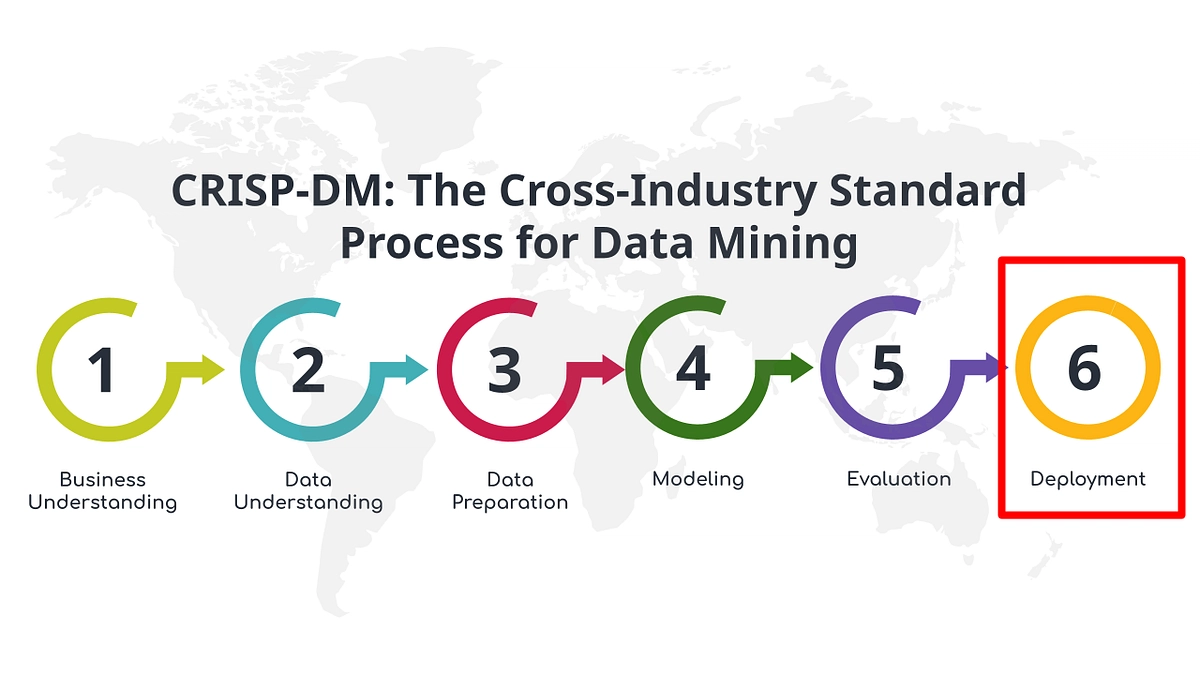
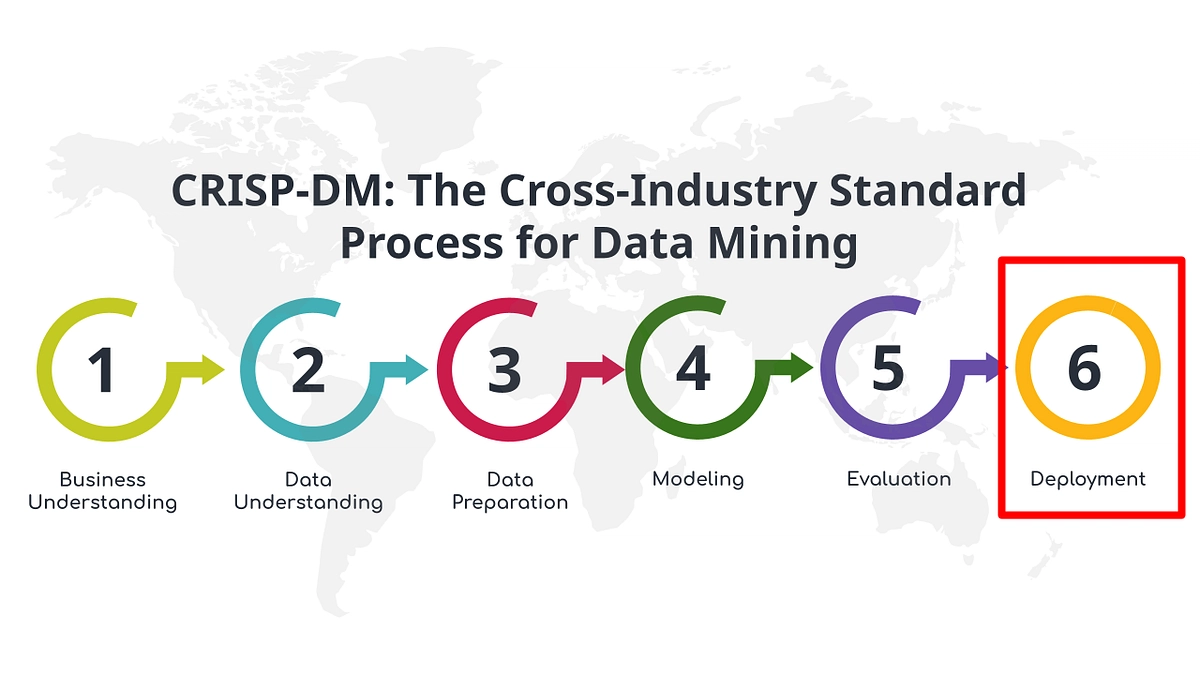

# Librerias

In [1]:
# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modelos comunes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Business Understanding

**Objetivo del negocio**: Predecir si un pasajero sobrevivió o no al naufragio del Titanic.  
**Valor para el negocio**: Esta predicción simula cómo los datos históricos pueden ayudar a mejorar la seguridad o tomar decisiones rápidas en contextos similares.



---

# 2. Data Understanding

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def resumen_nulos(df):
    resumen = pd.DataFrame({
        'Tipo de Dato': df.dtypes,
        'Nulos': df.isnull().sum(),
        'Porcentaje Nulos (%)': df.isnull().mean() * 100,
        'Valores Únicos': df.nunique(dropna=True)
    })

    resumen = resumen.sort_values(by='Nulos', ascending=False)
    
    print("Resumen de Nulos y Características del DataFrame:\n")
    print(resumen)

    total_nulos = df.isnull().sum().sum()
    total_valores = df.size
    print(f"\nTotal de valores nulos en el DataFrame: {total_nulos}")
    print(f"Porcentaje total de nulos: {100 * total_nulos / total_valores:.2f}%")

resumen_nulos(train_df)


Resumen de Nulos y Características del DataFrame:

            Tipo de Dato  Nulos  Porcentaje Nulos (%)  Valores Únicos
Cabin             object    687             77.104377             147
Age              float64    177             19.865320              88
Embarked          object      2              0.224467               3
PassengerId        int64      0              0.000000             891
Survived           int64      0              0.000000               2
Pclass             int64      0              0.000000               3
Name              object      0              0.000000             891
Sex               object      0              0.000000               2
SibSp              int64      0              0.000000               7
Parch              int64      0              0.000000               7
Ticket            object      0              0.000000             681
Fare             float64      0              0.000000             248

Total de valores nulos en el DataFrame

**Descripción general**

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.duplicated().sum()

0

In [7]:
catcols_train = train_df.describe(include=['object']).columns
catcols_train

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [8]:
numcols_train = train_df.describe(include=['int64','float64']).columns
numcols_train

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

- Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
- Categorical Features: Survived, Sex, Embarked, Pclass

In [9]:
train_df = train_df.drop(['Cabin','Name','Ticket'], axis = 1)
test_df = test_df.drop(['Cabin','Name','Ticket'], axis = 1)

In [10]:
train_df.sample(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
739,740,0,3,male,NaN,0,0,7.8958,S
166,167,1,1,female,NaN,0,1,55.0000,S
284,285,0,1,male,NaN,0,0,26.0000,S
65,66,1,3,male,NaN,1,1,15.2458,C
498,499,0,1,female,25.0,1,2,151.5500,S


## Exploratory data analysis (EDA)

### Bar plot supervived

<Axes: xlabel='Sex', ylabel='Survived'>

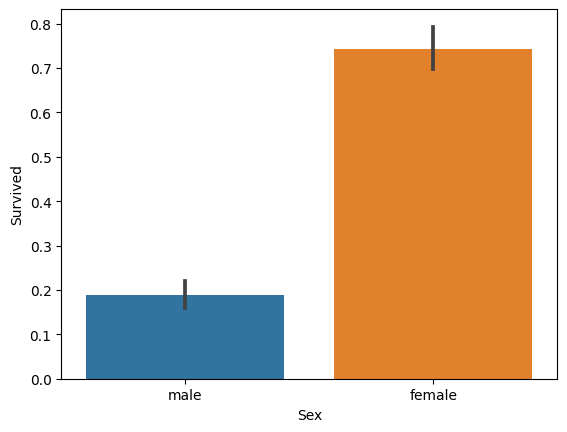

In [11]:
sns.barplot(x="Sex", y="Survived", data=train_df)

**ojo**

<Axes: >

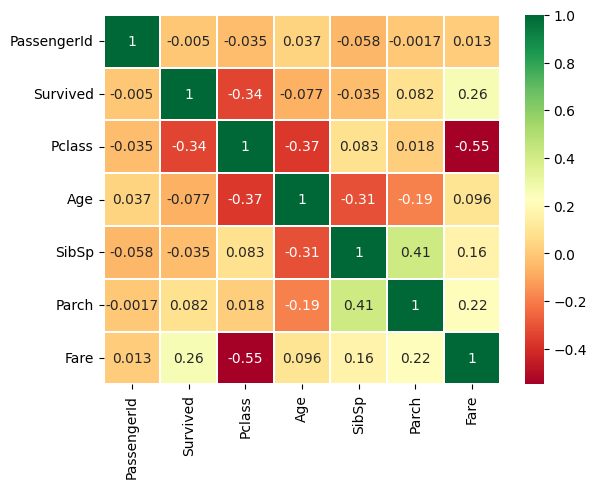

In [12]:
sns.heatmap(train_df[numcols_train].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

**Interpretation**

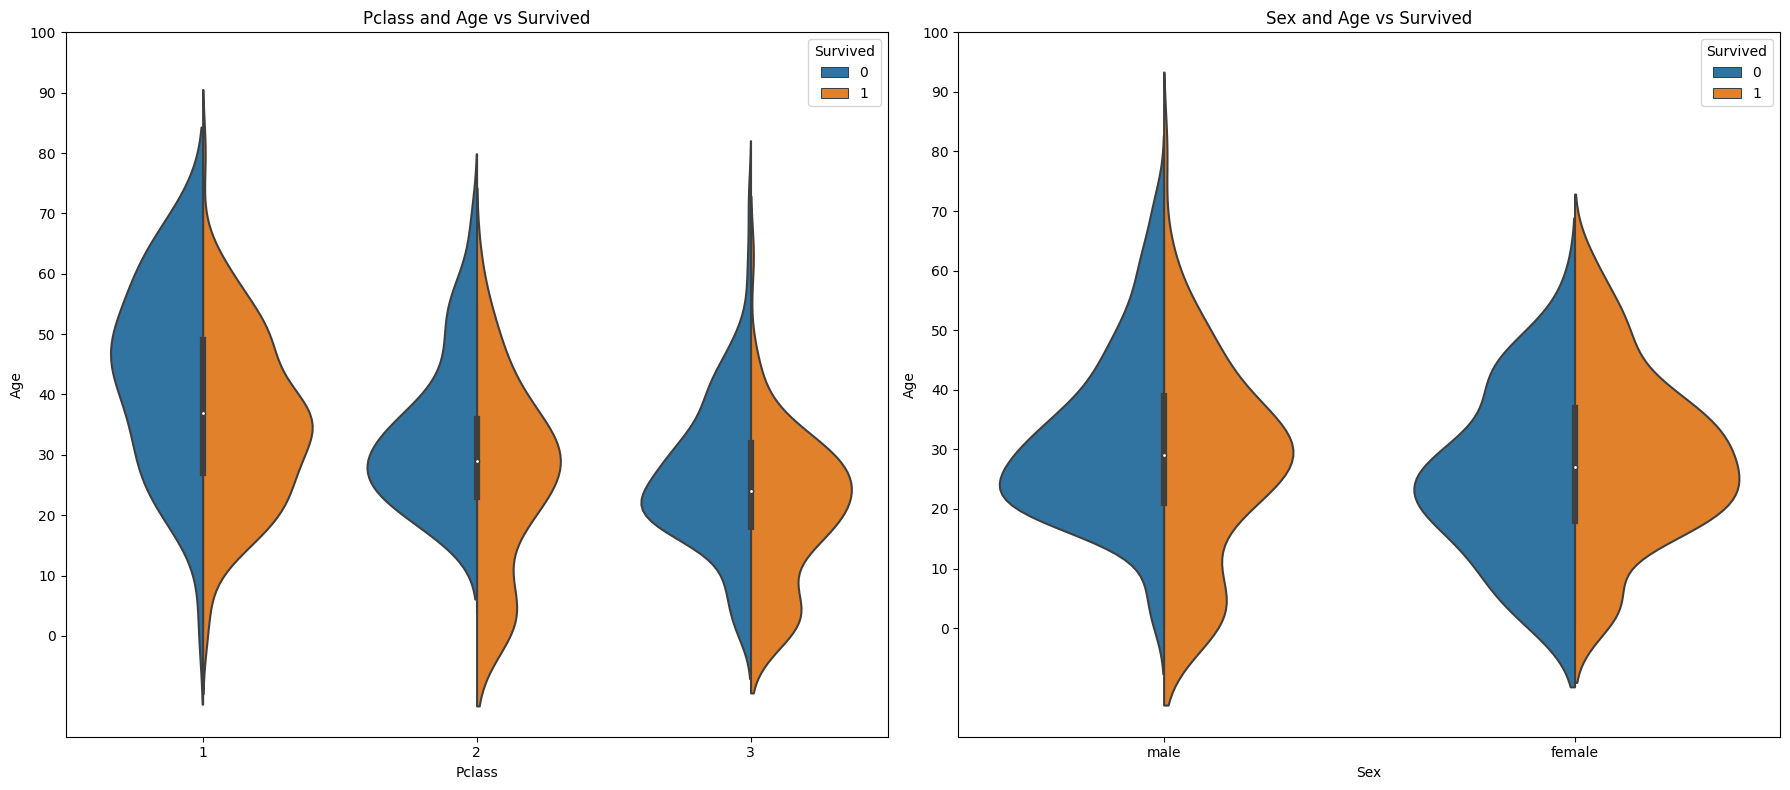

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Primer gráfico: Edad vs Clase
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# Segundo gráfico: Edad vs Sexo
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.tight_layout()
plt.show()

# 3. Preparación de los Datos

## Limpieza de datos

## Codificación de variables categóricas

## Seleccion de variables

In [14]:
# #IMPUTAR VALORES FALTANTES
# train['Age'].fillna(train['Age'].median(), inplace=True)
# train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# #CODIFICAR VARIABLES CATEGÓRICAS
# train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
# train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# #SELECCIONAR VARIABLES
# features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# X = train[features]
# y = train['Survived']


# 4. Modelado

# 5. Evaluación

# 6. Despliegue